In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


import joblib

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
for col in df.columns:
    print(f'For Column {col} \n---------------------------------\n')
    print(df[col].value_counts())
    print('\n')

For Column id 
---------------------------------

16380    1
58061    1
69918    1
23238    1
4807     1
        ..
35085    1
44375    1
5464     1
50522    1
49152    1
Name: id, Length: 5110, dtype: int64


For Column gender 
---------------------------------

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


For Column age 
---------------------------------

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64


For Column hypertension 
---------------------------------

0    4612
1     498
Name: hypertension, dtype: int64


For Column heart_disease 
---------------------------------

0    4834
1     276
Name: heart_disease, dtype: int64


For Column ever_married 
---------------------------------

Yes    3353
No     1757
Name: ever_married, dtype: int64


For Column work_type 
---------------------------------

Private          2925

In [5]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.drop(df[df['smoking_status'] == 'Unknown'].index, inplace = True)

In [6]:
df['smoking_status']=df['smoking_status'].replace('never smoked','never_smoked',regex=True)
df['smoking_status']=df['smoking_status'].replace('formerly smoked','formerly_smoked',regex=True)
df['work_type']=df['work_type'].replace('Self-employed','Self_employed',regex=True)

In [7]:
df.drop('id',axis='columns',inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,NaN,never_smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never_smoked,1


In [8]:
for col in df.columns:
    print(f'For Column {col} \n---------------------------------\n')
    print(df[col].value_counts())
    print('\n')

For Column gender 
---------------------------------

Female    2158
Male      1407
Name: gender, dtype: int64


For Column age 
---------------------------------

54.0    80
57.0    77
78.0    77
52.0    74
51.0    72
        ..
15.0    24
13.0    19
12.0    19
11.0    12
10.0    10
Name: age, Length: 73, dtype: int64


For Column hypertension 
---------------------------------

0    3119
1     446
Name: hypertension, dtype: int64


For Column heart_disease 
---------------------------------

0    3337
1     228
Name: heart_disease, dtype: int64


For Column ever_married 
---------------------------------

Yes    2710
No      855
Name: ever_married, dtype: int64


For Column work_type 
---------------------------------

Private          2284
Self_employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64


For Column residence_type 
---------------------------------

Urban    1814
Rural    1751
Name: residence_type, dtype: int64




In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [10]:
for col in df.columns:
    print(f'For Column {col} \n---------------------------------\n')
    print(df[col].value_counts())
    print('\n')

For Column gender 
---------------------------------

Female    2158
Male      1407
Name: gender, dtype: int64


For Column age 
---------------------------------

54.0    80
57.0    77
78.0    77
52.0    74
51.0    72
        ..
15.0    24
13.0    19
12.0    19
11.0    12
10.0    10
Name: age, Length: 73, dtype: int64


For Column hypertension 
---------------------------------

0    3119
1     446
Name: hypertension, dtype: int64


For Column heart_disease 
---------------------------------

0    3337
1     228
Name: heart_disease, dtype: int64


For Column ever_married 
---------------------------------

Yes    2710
No      855
Name: ever_married, dtype: int64


For Column work_type 
---------------------------------

Private          2284
Self_employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64


For Column residence_type 
---------------------------------

Urban    1814
Rural    1751
Name: residence_type, dtype: int64




In [11]:
imputer = KNNImputer()
df['bmi'] = imputer.fit_transform(df[['bmi']])
df['bmi'].isnull().sum()

0

# Data Visualizations

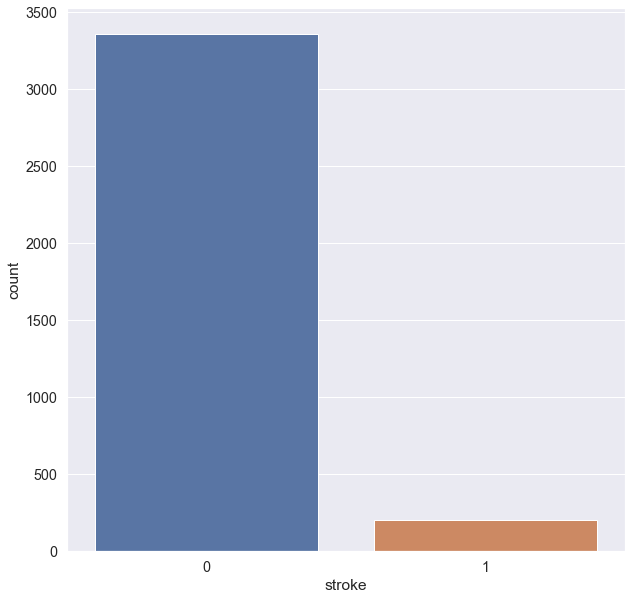

In [12]:
sns.countplot(df['stroke'])

### It seems we have an imbalanced dataset.

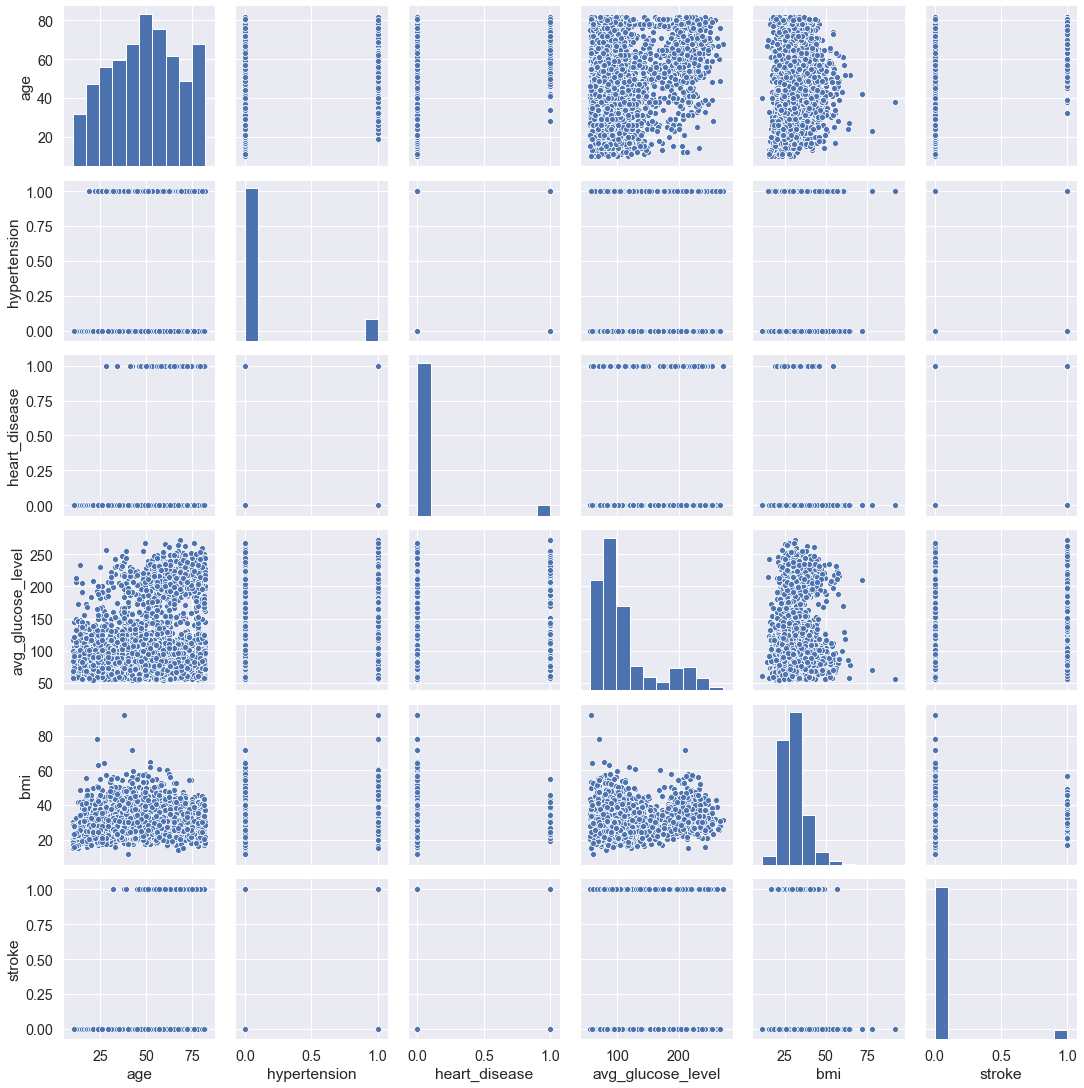

In [13]:
sns.pairplot(df)

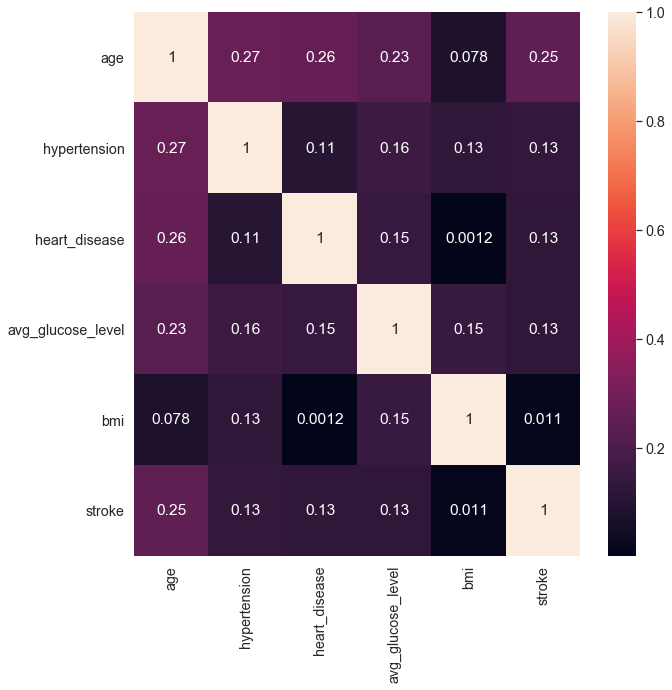

In [14]:
sns.heatmap(df.corr(),annot=True)

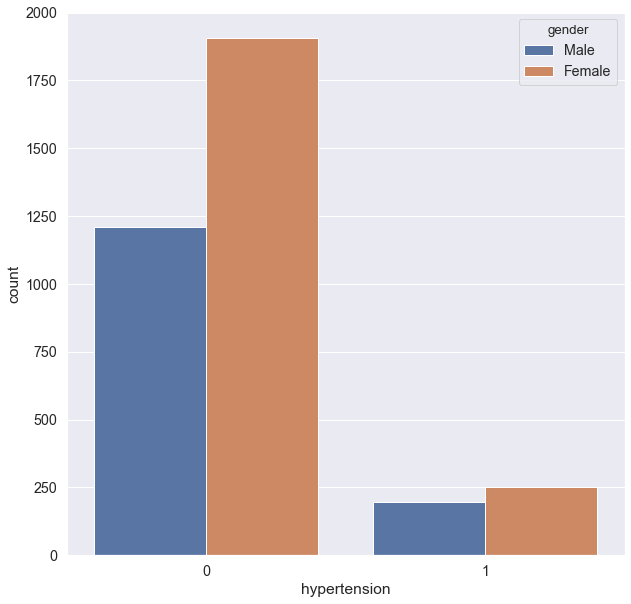

In [15]:
sns.countplot(df['hypertension'],data=df,hue='gender')

## Males have a lower chance of having hyptertension compared to females

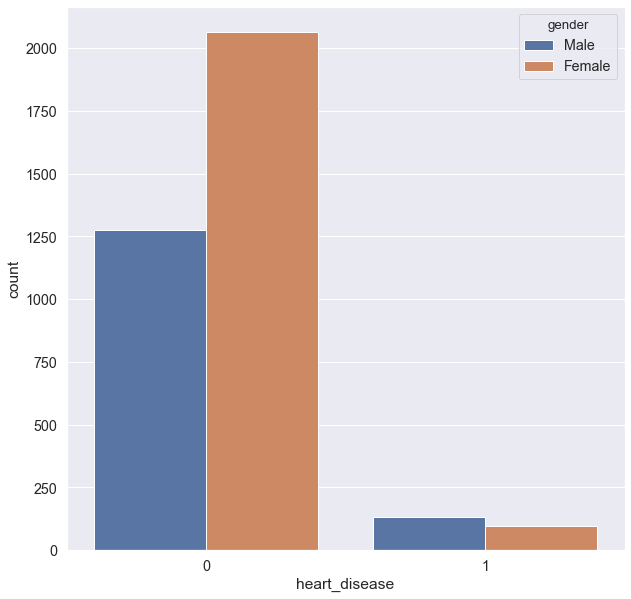

In [16]:
sns.countplot(df['heart_disease'],data=df,hue='gender')

## Males have a higher chance of having heart disease compared to Females.

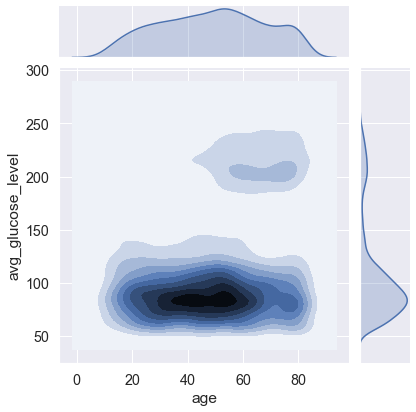

In [17]:
sns.jointplot('age','avg_glucose_level',data=df,kind='kde')

## It seems most of the data is concentrated between 50-100 average glucose level from ages 20-80, and another concentration of data between 200-230 average glucose level and from ages 55-80

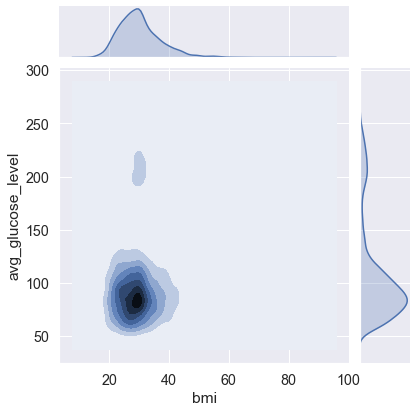

In [18]:
sns.jointplot('bmi','avg_glucose_level',data=df,kind='kde')

## The majority of data is concentrated between the ages of 20-40 bmi and between 50-120 average blood glucose

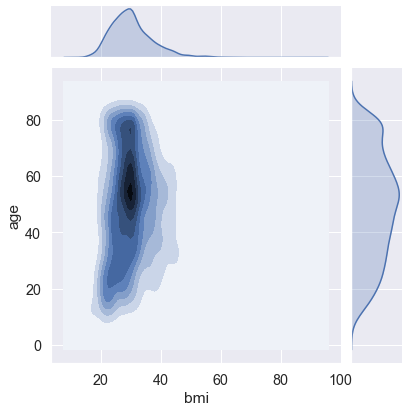

In [19]:
sns.jointplot('bmi','age',data=df,kind='kde')

## Age has a uniform distribution from 15-85 and bmi is distributed between 20-40

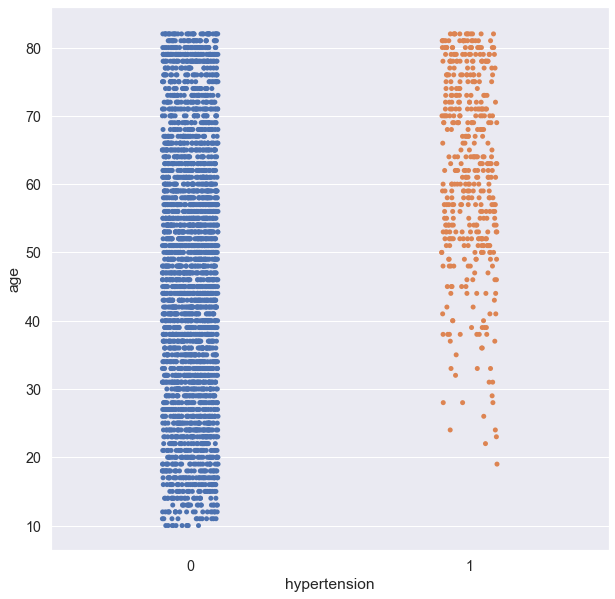

In [20]:
sns.stripplot('hypertension','age',data=df)

## The older ages have hypertension due to the data becoming more dense from 50-80

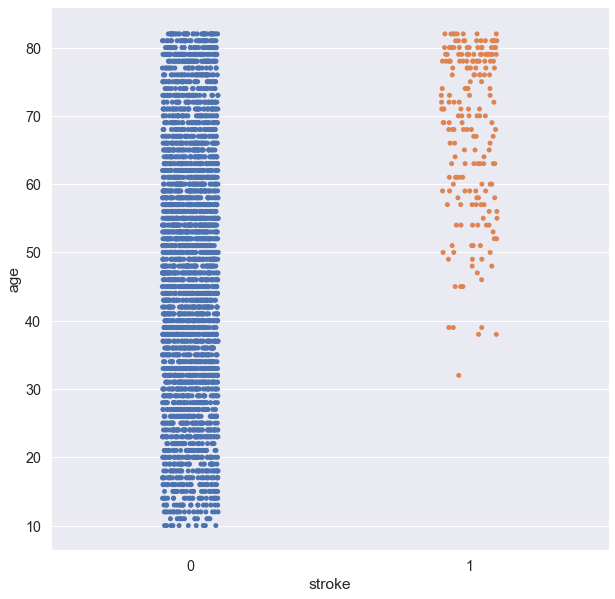

In [21]:
sns.stripplot('stroke','age',data=df)

## The data becomes dense from age 60-90, which means the younger you are the less likely you will have a strooke. The older you get, the higher the chance of you getting a stroke.

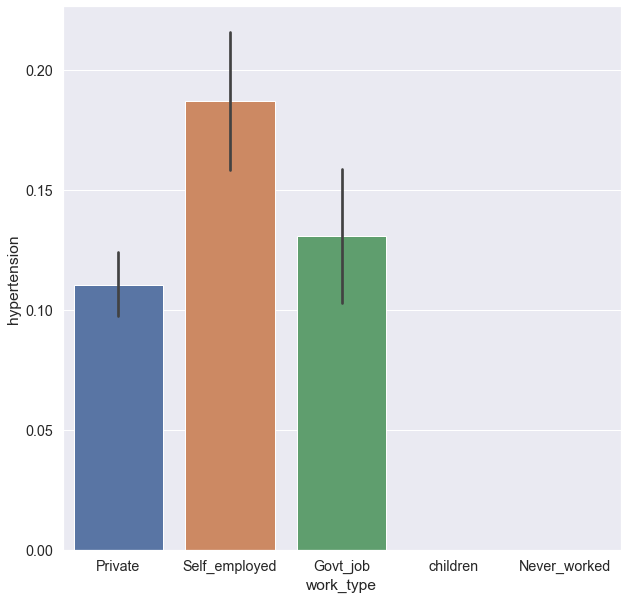

In [22]:
sns.barplot('work_type','hypertension',data=df)

## If you are self-employed you have the highest chance of getting hypertension, followed by working in a government job followed by working in the private sector.

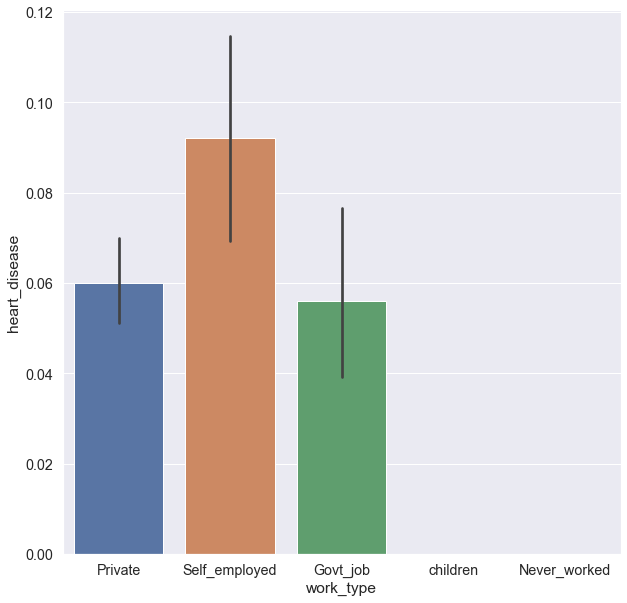

In [23]:
sns.barplot('work_type','heart_disease',data=df)

## Self-employed people have the highest chance of getting heart disease, followed by people working in the private sector, then lastly people work in government jobs.

# Data Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3565 non-null   object 
 1   age                3565 non-null   float64
 2   hypertension       3565 non-null   int64  
 3   heart_disease      3565 non-null   int64  
 4   ever_married       3565 non-null   object 
 5   work_type          3565 non-null   object 
 6   residence_type     3565 non-null   object 
 7   avg_glucose_level  3565 non-null   float64
 8   bmi                3565 non-null   float64
 9   smoking_status     3565 non-null   object 
 10  stroke             3565 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 494.2+ KB


In [25]:
df = pd.get_dummies(df, columns=['gender','ever_married','work_type','residence_type','smoking_status'], drop_first=True)
df.columns= df.columns.str.lower()
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_male,ever_married_yes,work_type_never_worked,work_type_private,work_type_self_employed,work_type_children,residence_type_urban,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60000,1,1,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,30.29235,1,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,1,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,0,1,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.00000,1,0,1,0,0,1,0,0,1,0


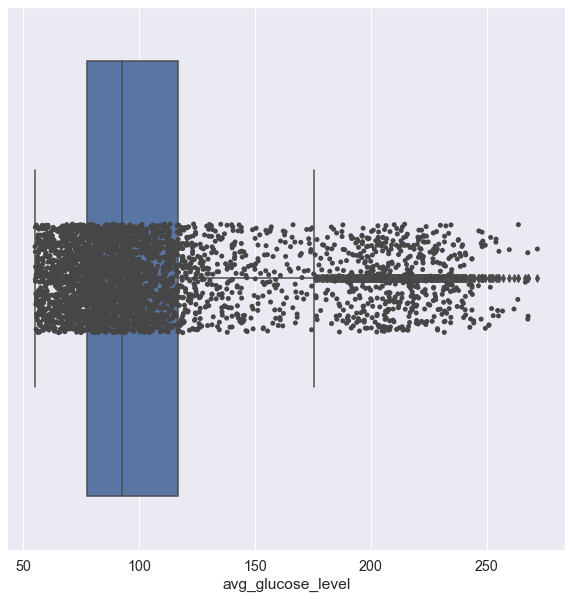

In [26]:
sns.boxplot(x='avg_glucose_level', data=df)
sns.stripplot(x='avg_glucose_level', data=df, color="#474646")

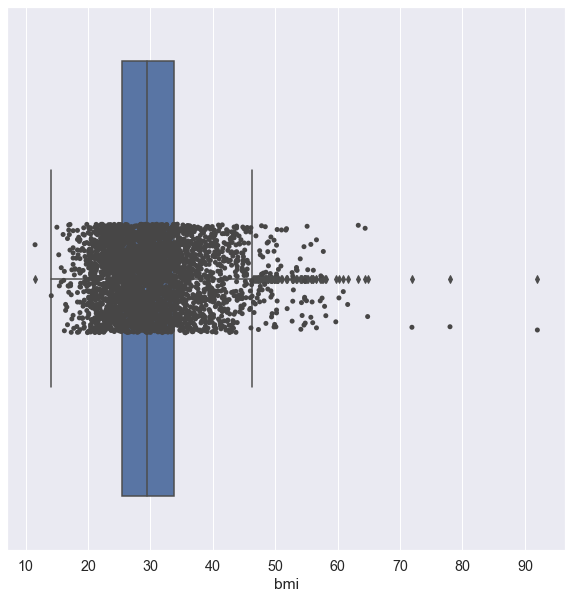

In [27]:
sns.boxplot(x='bmi', data=df)
sns.stripplot(x='bmi', data=df, color="#474646")

## We will leave the outliers as they are needed in predicting, because a health 80 year old who never smoked may have a lower chance of getting a stroke than a 50 year old who smokes.

In [28]:
scaler = StandardScaler()

X = df.drop('stroke', axis=1)
y = df['stroke']

columns=['age','avg_glucose_level']
scaler.fit(X[columns])
X[columns] = scaler.transform(X[columns])

joblib.dump(scaler,'standard_scaler.h5')

['standard_scaler.h5']

## Due to the data being imbalanced we use oversampling by SMOTE.

In [29]:
sm = SMOTE(random_state=27)

X_sampled,y_sampled = sm.fit_resample(X, y)


# GridSearch CV to determine best ML model with the best paramteres

In [30]:
def find_best_model_using_gridsearchcv(X,y):
    
    algos={
        'random_forest_classifier':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[100,200,300,400,500],
                'criterion':['gini','entropy']
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
        'params':{
            'penalty':['l1','l2','elasticnet','none'],
            'C':[0.1,1,10]
          }
        },
        'gaussian_nb':{
            'model':GaussianNB(),
            'params':{
                
            }
        },
        'svc':{
            'model':SVC(),
            'params':{
               
            }
        },
        'knn':{
            'model':KNeighborsClassifier(),
            'params':{
                'n_neighbors':[5,10,15,20],
                "weights":['uniform','distance']
            }
        },
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [31]:
find_best_model_using_gridsearchcv(X_sampled,y_sampled)

,model,best_score,best_params
0,random_forest_classifier,0.930312,"{'criterion': 'gini', 'n_estimators': 100}"
1,logistic_regression,0.814264,"{'C': 0.1, 'penalty': 'none'}"
2,gaussian_nb,0.530758,{}
3,svc,0.795097,{}
4,knn,0.892125,"{'n_neighbors': 5, 'weights': 'distance'}"


## It is seen from the table above that the best model to use is RFC of accuracy 93% with the parameters of criterion: gini and n_estimators=300

# Training RF Classifier

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=42)



model=RandomForestClassifier(criterion='gini',n_estimators=300)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [33]:
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       684
           1       0.90      0.96      0.93       662

    accuracy                           0.92      1346
   macro avg       0.93      0.92      0.92      1346
weighted avg       0.93      0.92      0.92      1346

0.924219910846954
[[611  73]
 [ 29 633]]


In [34]:
joblib.dump(model,'model.h5')

['model.h5']

# Function to predict values

In [35]:
def predict_stroke(age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,residence_type,smoking_status):
    
    
    if (gender.lower()=='male'):
        gender_male=1
    else:
        gender_male=0

    if (ever_married.lower()=='yes'):
        ever_married_yes=1
    else:
        ever_married_yes=0

    if(work_type.lower()=='private'):
        work_type_never_worked=0
        work_type_private=1
        work_type_self_employed=0
        work_type_children=0

    elif(work_type.lower()=='never_worked'):
        work_type_never_worked =1
        work_type_private =0
        work_type_self_employed =0
        work_type_children =0

    elif (work_type.lower() == 'self_employed'):
        work_type_never_worked =0
        work_type_private =0
        work_type_self_employed =1
        work_type_children =0

    elif (work_type.lower() == 'children'):
        work_type_never_worked =0
        work_type_private =0
        work_type_self_employed =0
        work_type_children =1

    else:
        work_type_never_worked =0
        work_type_private =0
        work_type_self_employed =0
        work_type_children =0

    if(residence_type.lower()=='urban'):
        residence_type_urban=1
    else:
        residence_type_urban=0
        
    if(smoking_status.lower()=='never_smoked'):
        smoking_status_never_smoked =1
        smoking_status_smokes =0
        
    elif(smoking_status.lower()=='smokes'):
        smoking_status_never_smoked =0
        smoking_status_smokes =1

    else:
        smoking_status_never_smoked =0
        smoking_status_smokes =0


    # target = predict([[all variables after one hot encoding]])
    
    
    int_features=np.array([age, hypertension, heart_disease, avg_glucose_level, bmi, gender_male, ever_married_yes, work_type_never_worked, work_type_private, work_type_self_employed, work_type_children, residence_type_urban, smoking_status_never_smoked, smoking_status_smokes])
    final_features= int_features.reshape(1,-1)
    
    
    stroke_state=model.predict(final_features)[0]
    
    if(stroke_state==0):
        print('You are healthy, good job!')
    else:
        print('You aren\'t healthy, please go to nearest doctor')

In [36]:
predict_stroke(25,0,0,80,25,'Male','No','Self_employed','urban','smokes')

You are healthy, good job!
